In [ ]:
#Load data-preprocessing libraries
import pandas as pd
import numpy as np

#Text processing libraries
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

#Load data-visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns


nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))

lemmatizer = WordNetLemmatizer()

pd.pandas.set_option('display.max_columns',None)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


**Import Necessary Library**

In [ ]:
# Download the WordNet resource
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Load the dataset**

In [ ]:
#Load training data
df_data=pd.read_csv('twitter_training.csv', header = None)
df_data.head(5)

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
df_valid = pd.read_csv('twitter_validation.csv', header = None)

In [ ]:
df_valid.head(3)

,0,1,2,3
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...


df_data.head() gives the first five rows of the dataset ...if you give the value then it gives that many rows.df_data.tail() gives the last five rows of the dataset

In [ ]:
df_data.tail(5)

,0,1,2,3
53822,2048,CallOfDuty,Negative,@ CfDuty fix their game new omg challenge with...
53823,2048,CallOfDuty,Negative,@CallofDuty fix your game new omg challenge re...
53824,2048,CallOfDuty,Negative,Dear @CallofDuty fix your stupid game new omg ...
53825,2048,CallOfDuty,Negative,@CallofDuty fix your game new omg challenge cu...
53826,2049,CallOfDuty,Negative,When I search for a game and a map comes up th...


In [ ]:
## Check how many rows are there

In [ ]:
len(df_data)

53827

In [ ]:
len(df_valid)

1000

In [ ]:
#rename the columns to get a better sense of data
df_data.rename(columns= {0:'Tweet_ID',1:'Topic',2:'Sentiment',3:'Tweet'},inplace=True)
df_data.head()

,Tweet_ID,Topic,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
df_valid.rename(columns= {0:'Tweet_ID',1:'Topic',2:'Sentiment',3:'Tweet'},inplace=True)
df_valid.head()

,Tweet_ID,Topic,Sentiment,Tweet
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


**EDA**

In [ ]:
# Calculate the number of sentiment labels in training data and validation data
train_sentiment_counts = df_data['Sentiment'].value_counts()
valid_sentiment_counts = df_valid['Sentiment'].value_counts()

In [ ]:
train_sentiment_counts

Sentiment
Positive      16080
Negative      14911
Neutral       12882
Irrelevant     9954
Name: count, dtype: int64

In [ ]:
valid_sentiment_counts

Sentiment
Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: count, dtype: int64

In [ ]:
print('Train data shape: ',df_data.shape)

Train data shape:  (53827, 4)


In [ ]:
print('Valid data shape: ',df_valid.shape)

Valid data shape:  (1000, 4)


**Check Missing Value**

In [ ]:
df_data.isnull().sum()

Tweet_ID       0
Topic          0
Sentiment      0
Tweet        492
dtype: int64

In [ ]:
#percentage of missing data
(df_data.isnull().sum()/len(df_data))*100

Tweet_ID     0.000000
Topic        0.000000
Sentiment    0.000000
Tweet        0.914039
dtype: float64

In [ ]:
df_valid.isnull().sum()

Tweet_ID     0
Topic        0
Sentiment    0
Tweet        0
dtype: int64

In [ ]:
len(df_data)

53827

In [ ]:
#As only 0.91% of data in Tweet features are null we will drop them
df_data.dropna(axis=0,inplace=True)

#check percentage of missing data after dropping missing features
(df_data.isnull().sum()/len(df_data))*100

Tweet_ID     0.0
Topic        0.0
Sentiment    0.0
Tweet        0.0
dtype: float64

In [ ]:
train_sentiment_counts = df_data['Sentiment'].value_counts()
valid_sentiment_counts = df_valid['Sentiment'].value_counts()

In [ ]:
len(df_data)

53335

**Check Duplicate Values**

In [ ]:
# check duplicate values
df_data.duplicated().sum()

1776

In [ ]:
# remove duplicate values
remove_duplicates = df_data.drop_duplicates()
df_data = remove_duplicates.copy()


In [ ]:
# check duplicate values
df_data.duplicated().sum()

0

In [ ]:
len(df_data)

51559

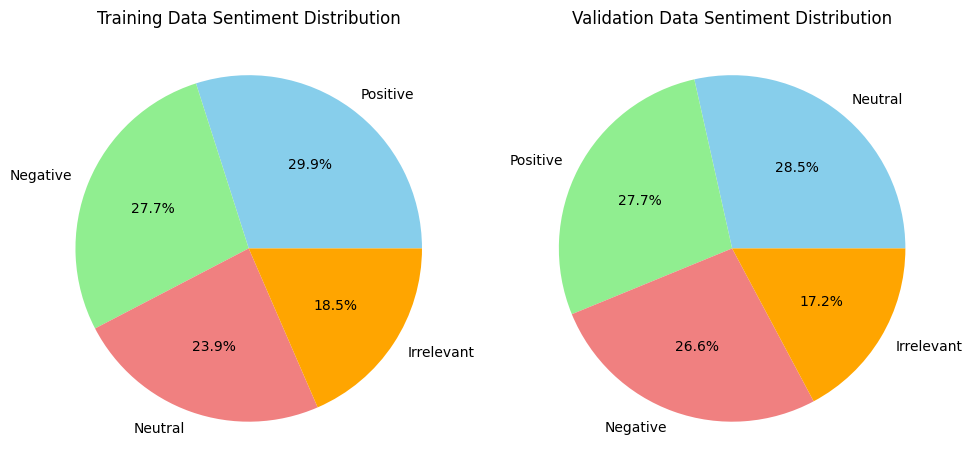

In [ ]:
# Draw a pie chart for the training data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(train_sentiment_counts, labels=train_sentiment_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral', 'orange'])
plt.title('Training Data Sentiment Distribution')

# Draw a pie chart for the valid data
plt.subplot(1, 2, 2)
plt.pie(valid_sentiment_counts, labels=valid_sentiment_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral', 'orange'])
plt.title('Validation Data Sentiment Distribution')

plt.tight_layout()
plt.show()

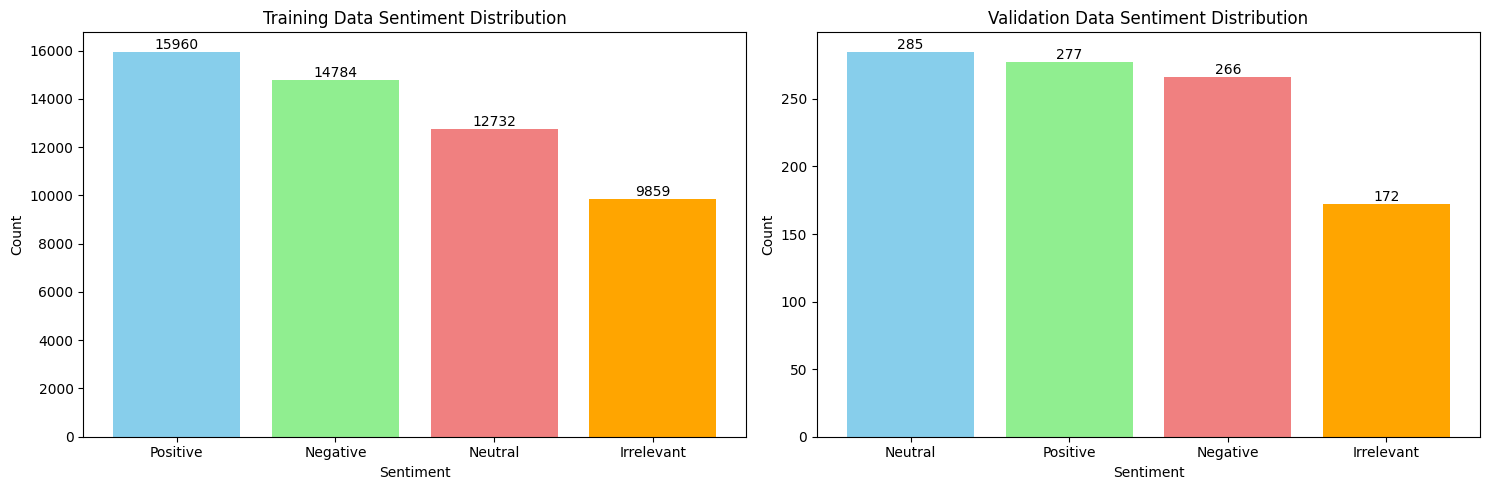

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.bar(train_sentiment_counts.index, train_sentiment_counts.values, color=['skyblue', 'lightgreen', 'lightcoral', 'orange'])
plt.title('Training Data Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Display quantity in each column
for i, count in enumerate(train_sentiment_counts.values):
    plt.text(x=i, y=count, s=str(count), ha='center', va='bottom')


plt.subplot(1, 2, 2)
plt.bar(valid_sentiment_counts.index, valid_sentiment_counts.values, color=['skyblue', 'lightgreen', 'lightcoral', 'orange'])
plt.title('Validation Data Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Display quantity in each column
for i, count in enumerate(valid_sentiment_counts.values):
    plt.text(x=i, y=count, s=str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51559 entries, 0 to 53826
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweet_ID   51559 non-null  int64 
 1   Topic      51559 non-null  object
 2   Sentiment  51559 non-null  object
 3   Tweet      51559 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.0+ MB


In [ ]:
print('Distinct Values: \n')
col=['Topic','Sentiment']
for i in col:
    print(i,'->')
    print(df_data[i].value_counts())
    print('\n')

Distinct Values: 

Topic ->
Topic
Verizon                              2319
Microsoft                            2304
WorldOfCraft                         2300
NBA2K                                2299
LeagueOfLegends                      2296
ApexLegends                          2278
Battlefield                          2255
Amazon                               2249
CallOfDutyBlackopsColdWar            2242
FIFA                                 2238
Dota2                                2225
Overwatch                            2220
Hearthstone                          2219
HomeDepot                            2216
Borderlands                          2206
Xbox(Xseries)                        2201
Google                               2199
CS-GO                                2195
PlayStation5(PS5)                    2183
Fortnite                             2176
AssassinsCreed                       2156
RedDeadRedemption(RDR)               2155
PlayerUnknownsBattlegrounds(PUBG)    2150


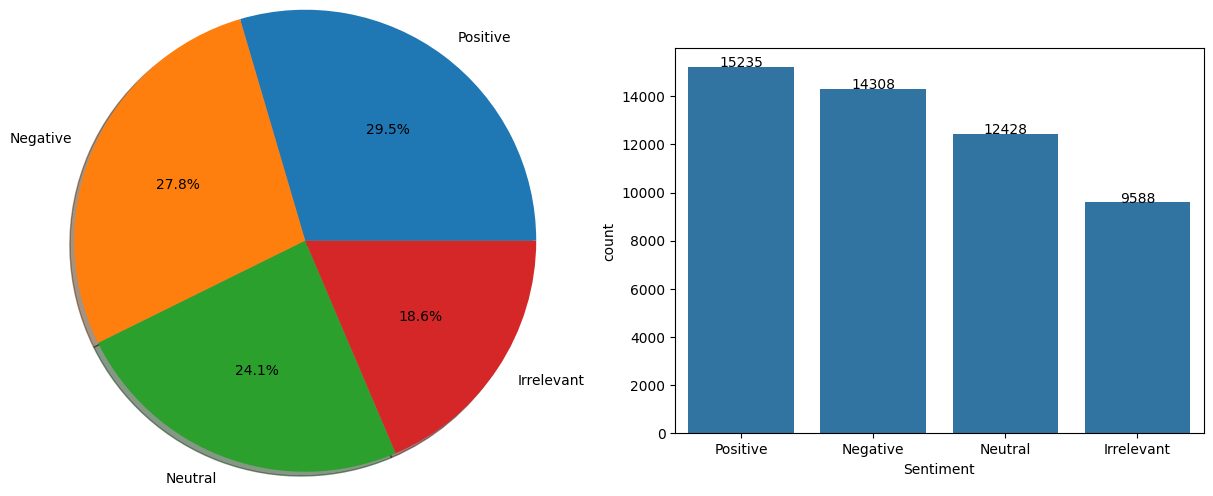

In [ ]:
#Visualizing Sentiment feature - Target feature
plt.figure(figsize=(15,5))

#plot pie chart
plt.subplot(1,2,1)
label = df_data['Sentiment'].value_counts().index
label_count = df_data['Sentiment'].value_counts().values
plt.pie(data=df_data, x=label_count, labels=label, autopct='%1.1f%%', shadow=True, radius=1.5)

#plot countplot
plt.subplot(1,2,2)
ax = sns.countplot(x='Sentiment', data=df_data, order=label)
for p in ax.patches:
    height=p.get_height()
    ax.text(x=p.get_x()+(p.get_width()/2),
    y=height+0.2,ha='center',s='{:.0f}'.format(height))
plt.show()

Note:

From the above graphs we can observe that the dataset is balanced.

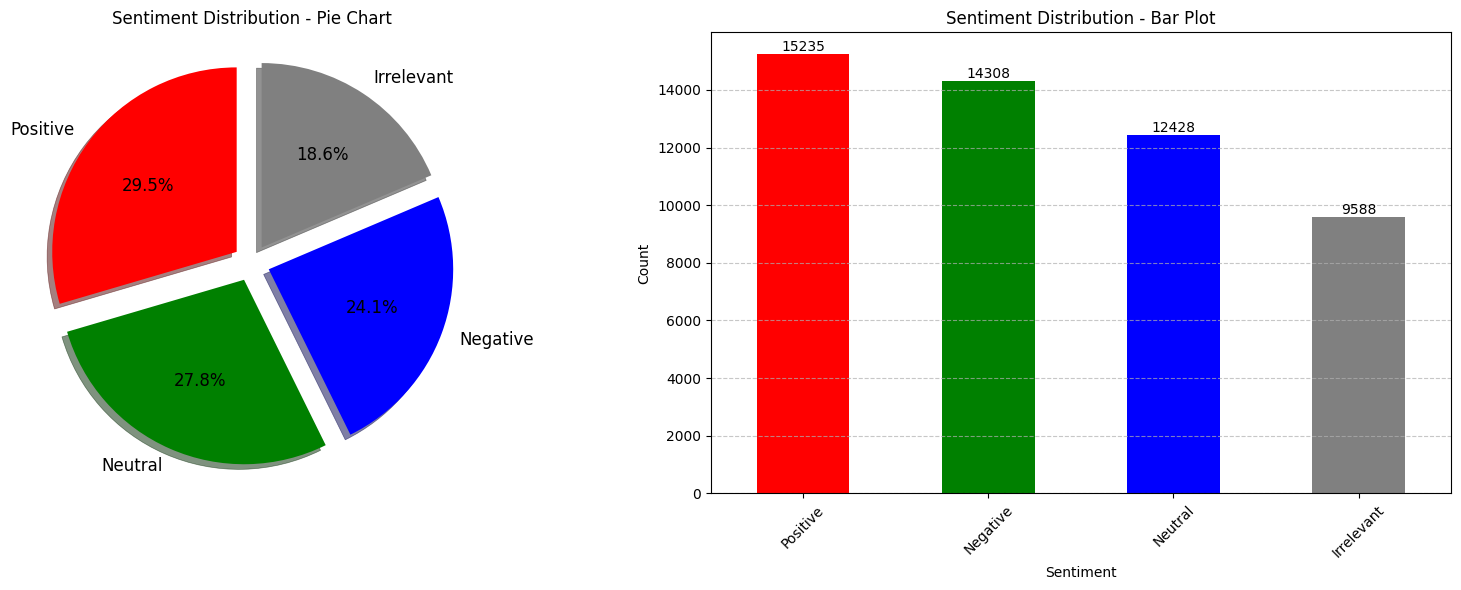

In [ ]:
# Define custom colors
colors = ['red', 'green', 'blue', 'gray']

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plotting pie chart for sentiment distribution with custom colors
axs[0].pie(df_data['Sentiment'].value_counts(), labels=df_data['Sentiment'].unique(), autopct='%1.1f%%',
            startangle=90, wedgeprops={'linewidth': 0.5}, textprops={'fontsize': 12},
            explode=[0.1, 0.1, 0.1, 0.1], colors=colors, shadow=True)
axs[0].set_title('Sentiment Distribution - Pie Chart')

# Plotting bar plot for sentiment distribution
axs[1] = df_data['Sentiment'].value_counts().plot(kind='bar', color=colors, ax=axs[1])
axs[1].set_title('Sentiment Distribution - Bar Plot')
axs[1].set_xlabel('Sentiment')
axs[1].set_ylabel('Count')
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

# Add text on top of each bar in the bar plot
for p in axs[1].patches:
    axs[1].annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

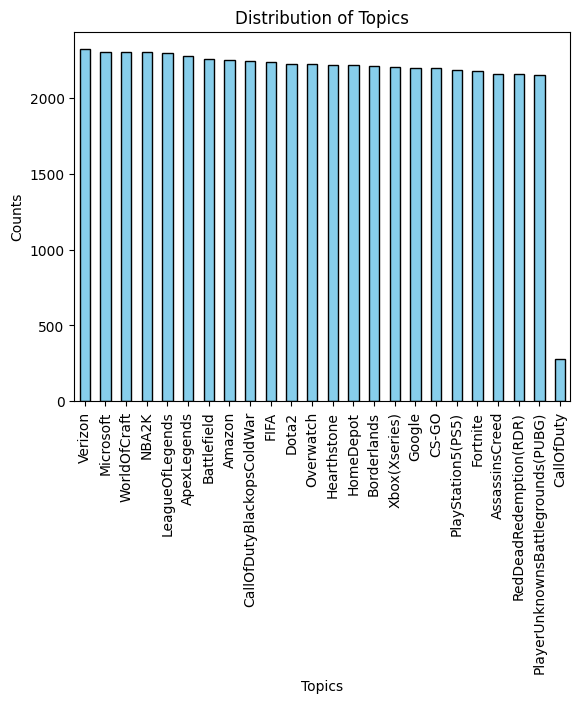

In [ ]:
# Plotting the value counts of 'Topic' column
df_data['Topic'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')

# Adding a title and labels
plt.title('Distribution of Topics')
plt.xlabel('Topics')
plt.ylabel('Counts')

# Display the plot
plt.show()

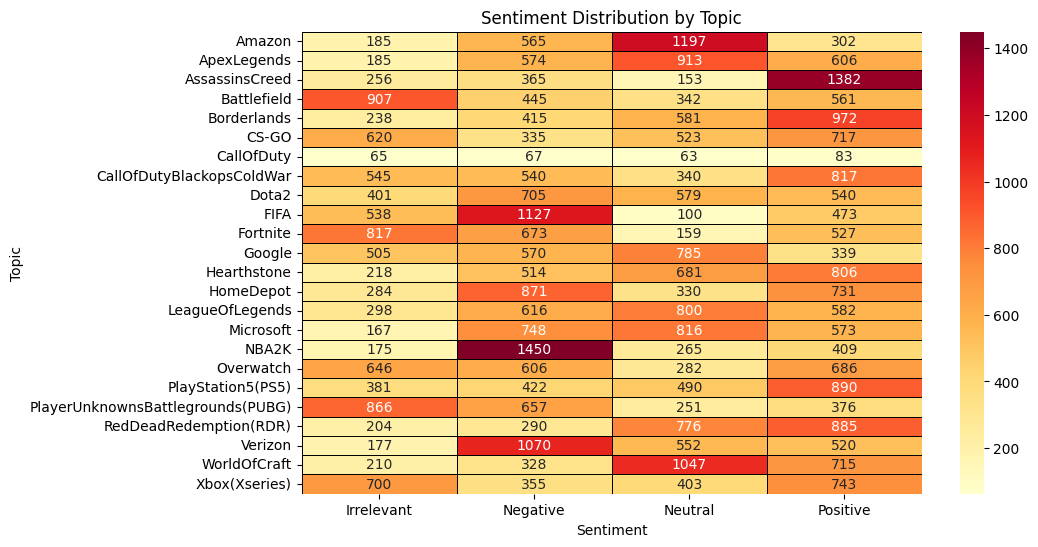

In [ ]:

# Create a cross-tabulation table
count_table = pd.crosstab(index=df_data['Topic'], columns=df_data['Sentiment'])

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(count_table, cmap='YlOrRd', annot=True, fmt='d', linewidths=0.5, linecolor='black')

# Adding title and labels
plt.title('Sentiment Distribution by Topic')
plt.xlabel('Sentiment')
plt.ylabel('Topic')

# Display the plot
plt.show()


In [ ]:
# Display minimum and maximum values for each sentiment for each topic
for sentiment in count_table.columns:
    min_topic = count_table[sentiment].idxmin()
    max_topic = count_table[sentiment].idxmax()
    min_val = count_table[sentiment].min()
    max_val = count_table[sentiment].max()
    print(f"Sentiment '{sentiment}':")
    print(f"  Minimum value '{min_val}' at Topic '{min_topic}'")
    print(f"  Maximum value '{max_val}' at Topic '{max_topic}'\n")


Sentiment 'Irrelevant':
  Minimum value '65' at Topic 'CallOfDuty'
  Maximum value '907' at Topic 'Battlefield'

Sentiment 'Negative':
  Minimum value '67' at Topic 'CallOfDuty'
  Maximum value '1450' at Topic 'NBA2K'

Sentiment 'Neutral':
  Minimum value '63' at Topic 'CallOfDuty'
  Maximum value '1197' at Topic 'Amazon'

Sentiment 'Positive':
  Minimum value '83' at Topic 'CallOfDuty'
  Maximum value '1382' at Topic 'AssassinsCreed'



Sentiment : Positive
  Minimum value 154 at Topic 'Facebook'
  Maximum value 1382 at Topic 'AssassinsCreed'

Sentiment : Negative
  Minimum value 290 at Topic 'RedDeadRedemption(RDR)'
  Maximum value 1665 at Topic 'MaddenNFL'

Sentiment : Neutral
  Minimum value 100 at Topic 'FIFA'
  Maximum value 1197 at Topic 'Amazon'

Sentiment : Irrelevant
  Minimum value 23 at Topic 'TomClancysGhostRecon'
  Maximum value 907 at Topic 'Battelfield'


**Preprocessing The Data**

 Remove Non-String

Remove Non-String: In this step, any non-string characters or elements are removed from the text. For example, if your text contains numbers or special characters that are not relevant to the classification task, they can be removed.

Example:\ Input: "The product is priced at $99."\ Output: "The product is priced at ."

In [ ]:
def filter_non_string(df, column):
    """
    Filter out rows with non-string values in the specified column.
    Convert non-string values to strings.
    """
    df = df.dropna(subset=[column])
    df[column] = df[column].astype(str)
    return df

 Convert In LowerCase

Convert to Lowercase: This step involves converting all the text to lowercase. It helps in treating words with different cases as the same and reduces the vocabulary size.

Example:
Input: "I LOVE SM."
Output: "i love sm."

In [ ]:
def normalize_text(text):
    """Convert text to lowercase to ensure consistency across the corpus."""
    return text.lower()

Remove HTML Tags

Remove HTML Tags: If your text contains HTML tags, such as

, , or , you may want to remove them as they usually don't contribute to the classification task.

Example:
Input: "

This is an >>important>> <<>>message.

"
Output: "This is an important message."

In [ ]:
def remove_html_tags(text):
    """Remove HTML tags from the text."""
    return re.sub(r'<.*?>', '', text)



Remove URL Or HyperLin

Remove URLs: URLs or website links might not provide any useful information for classification and can be removed.

Example:
Input: "Check out this amazing website: www.example.com"
Output: "Check out this amazing website:"

In [ ]:
def remove_urls(text):
    """Remove URLs or hyperlinks from the text."""
    return re.sub(r'http\S+|www\S+', '', text)

Remove Numeric Digit

Remove Numeric Digits: Numeric digits are often irrelevant for text classification tasks and can be removed.

Example:
Input: "I have 10 apples."
Output: "I have apples."



In [ ]:
def remove_numbers(text):
    """Exclude numerical digits from the text."""
    return re.sub(r'\d+', '', text)


Remove Punctuation

Remove Punctuation: Punctuation marks such as periods, commas, or exclamation marks can be removed as they usually don't carry important semantic information.

Example:
Input: "Hello, how are you?"
Output: "Hello how are you"



In [ ]:
def remove_punctuation(text):
    """Remove punctuation marks from the text."""
    return text.translate(str.maketrans('', '', string.punctuation))


Split Text In Token

Split Text into Tokens: This step involves splitting the text into individual words or tokens. Tokens serve as the basic units for further analysis.

Example:
Input: "I love natural language processing."
Output: ["I", "love", "natural", "language", "processing"]



In [ ]:
def tokenize_text(text):
    """Split the text into individual words or tokens."""
    return word_tokenize(text)

 Eliminate Stopwords

Eliminate Stop Words: Stop words are commonly used words like "the," "is," or "and" that don't carry much meaning and can be removed to reduce noise in the data.

Example:
Input: "The quick brown fox jumps over the lazy dog."
Output: ["quick", "brown", "fox", "jumps", "lazy", "dog"]

In [ ]:
def remove_stopwords(tokens):
    """Eliminate common stopwords from the tokenized text."""
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word not in stop_words]

Remove Emojis

Remove Emoji: Emojis are graphical representations that may not contribute much to the classification task and can be removed.

Example:
Input: "I'm feeling 😊 today."
Output: "I'm feeling today."

In [ ]:
import re

def remove_emojis(text):
    """Remove emojis from the text."""
    if isinstance(text, str):
        emoji_pattern = re.compile("["
                                   u"\U0001F600-\U0001F64F"  # emoticons
                                   u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                   u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                   u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                   u"\U00002500-\U00002BEF"  # chinese char
                                   u"\U00002702-\U000027B0"
                                   u"\U00002702-\U000027B0"
                                   u"\U000024C2-\U0001F251"
                                   u"\U0001f926-\U0001f937"
                                   u"\U00010000-\U0010ffff"
                                   u"\u2640-\u2642"
                                   u"\u2600-\u2B55"
                                   u"\u200d"
                                   u"\u23cf"
                                   u"\u23e9"
                                   u"\u231a"
                                   u"\ufe0f"  # dingbats
                                   u"\u3030"
                                   "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', text)
    else:
        return text

Vectorize Data

Vectorized Data: Text data needs to be converted into numerical vectors for machine learning algorithms to process. Various techniques like Bag-of-Words, TF-IDF, or word embeddings can be used for vectorizing the text.

Example:
Input: ["I", "love", "OpenAI"]
Output: [0, 1, 1, 0, 0, 0, 0, 0, 1, 0, ...] (vector representation)

In [ ]:
def vectorize_data(text_data):
    # Join the tokenized text into strings
    text_data_strings = [" ".join(tokens) for tokens in text_data]
    # Initialize TfidfVectorizer
    tfidf_vectorizer = TfidfVectorizer()
    # Fit and transform the text data to generate TF-IDF vectors
    tfidf_vectors = tfidf_vectorizer.fit_transform(text_data_strings)
    return tfidf_vectors, tfidf_vectorizer

In [ ]:
df_data.head(2)

,Tweet_ID,Topic,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...


In [ ]:
import string


In [ ]:
def preprocess_text(df):
    df = filter_non_string(df, 'Tweet')
    df['Tweet'] = df['Tweet'].apply(normalize_text)
    df['Tweet'] = df['Tweet'].apply(remove_html_tags)
    df['Tweet'] = df['Tweet'].apply(remove_urls)
    df['Tweet'] = df['Tweet'].apply(remove_numbers)
    df['Tweet'] = df['Tweet'].apply(remove_punctuation)
    df['Tweet'] = df['Tweet'].apply(tokenize_text)
    df['Tweet'] = df['Tweet'].apply(remove_stopwords)
    df['Tweet'] = df['Tweet'].apply(remove_emojis)
    return df



In [ ]:
# Preprocess train and test DataFrames
df_train_processed = preprocess_text(df_data)
df_test_processed = preprocess_text(df_valid)

In [ ]:
df_train_processed.head(3)

,Tweet_ID,Topic,Sentiment,Tweet
0,2401,Borderlands,Positive,"[im, getting, borderlands, murder]"
1,2401,Borderlands,Positive,"[coming, borders, kill]"
2,2401,Borderlands,Positive,"[im, getting, borderlands, kill]"


In [ ]:
df_train_processed.head(3)
df_test_processed = preprocess_text(df_valid)

In [ ]:
df_test_processed.head()

,Tweet_ID,Topic,Sentiment,Tweet
0,3364,Facebook,Irrelevant,"[mentioned, facebook, struggling, motivation, ..."
1,352,Amazon,Neutral,"[bbc, news, amazon, boss, jeff, bezos, rejects..."
2,8312,Microsoft,Negative,"[microsoft, pay, word, functions, poorly, sams..."
3,4371,CS-GO,Negative,"[csgo, matchmaking, full, closet, hacking, tru..."
4,4433,Google,Neutral,"[president, slapping, americans, face, really,..."


**Build Model**

In [ ]:
# Convert list of words into a single string for each entry in 'Tweet' column
df_train_processed['Tweet'] = df_train_processed['Tweet'].apply(lambda x: ' '.join(x))
df_test_processed['Tweet'] = df_test_processed['Tweet'].apply(lambda x: ' '.join(x))

# Split data into features (X) and target (y) for train and test sets
X_train = df_train_processed['Tweet']
y_train = df_train_processed['Sentiment']

X_test = df_test_processed['Tweet']
y_test = df_test_processed['Sentiment']

# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (51559,)
Shape of y_train: (51559,)
Shape of X_test: (1000,)
Shape of y_test: (1000,)


 RandomForestClassifier

In [ ]:
# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)

# Predict on the testing data
y_pred = rf_classifier.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.834


 Confusion Matrix

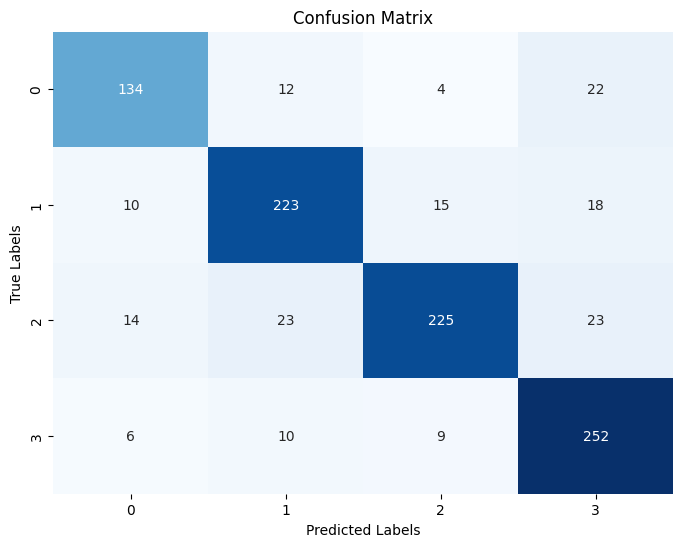

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.82      0.78      0.80       172
    Negative       0.83      0.84      0.84       266
     Neutral       0.89      0.79      0.84       285
    Positive       0.80      0.91      0.85       277

    accuracy                           0.83      1000
   macro avg       0.83      0.83      0.83      1000
weighted avg       0.84      0.83      0.83      1000



In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a classification report
class_report = classification_report(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print classification report
print("Classification Report:")
print(class_report)

**Actual VS Predicred**

In [ ]:
# Print some actual vs predicted labels along with tweet text
print("Actual vs Predicted Labels with Tweet Text:")
for tweet, actual_label, predicted_label in zip(X_test[:10], y_test[:10], y_pred[:10]):
    print("Tweet:", tweet)
    print("Actual Label:", actual_label)
    print("Predicted Label:", predicted_label)
    print("-----------------------")

Actual vs Predicted Labels with Tweet Text:
Tweet: mentioned facebook struggling motivation go run day translated tom ’ great auntie ‘ hayley ’ get bed ’ told grandma thinks ’ lazy terrible person 🤣
Actual Label: Irrelevant
Predicted Label: Positive
-----------------------
Tweet: bbc news amazon boss jeff bezos rejects claims company acted like drug dealer bbccouknewsavbusine…
Actual Label: Neutral
Predicted Label: Neutral
-----------------------
Tweet: microsoft pay word functions poorly samsungus chromebook 🙄
Actual Label: Negative
Predicted Label: Negative
-----------------------
Tweet: csgo matchmaking full closet hacking truly awful game
Actual Label: Negative
Predicted Label: Negative
-----------------------
Tweet: president slapping americans face really commit unlawful act acquittal discover google vanityfaircomnewst…
Actual Label: Neutral
Predicted Label: Neutral
-----------------------
Tweet: hi eahelp ’ madeleine mccann cellar past years little sneaky thing escaped whilst lo

**Save Model**

In [ ]:
import joblib

# Save the trained model
joblib.dump(rf_classifier, 'rf_model.pkl')

['rf_model.pkl']

**Predict Random Tweet By Model**

In [ ]:
# Load the saved model
Tweet_Sentiment_Ai = joblib.load('rf_model.pkl')

# Define a mapping between sentiment labels and emojis
sentiment_emojis = {
    'Positive': '😄',
    'Negative': '😞',
    'Neutral': '😐',
    'Irrelevant': '🤷‍♂️'
}

In [ ]:
example_tweets = [
    "I just finished playing Borderlands and it was absolutely amazing! Can't wait for the next one!",
    "I'm really disappointed with the latest Borderlands update. It ruined the game for me.",
    "Haven't played Borderlands in a while. Need to catch up on the latest updates.",
    "Just saw a funny cat video while searching for Borderlands gameplay. Cats always cheer me up!"
]


# Transform example tweets into TF-IDF features
example_tweets_tfidf = vectorizer.transform(example_tweets)

# Predict sentiment for example tweets
predictions = Tweet_Sentiment_Ai.predict(example_tweets_tfidf)

# Print the predicted sentiment and corresponding emoji for each example tweet
for tweet, prediction in zip(example_tweets, predictions):
    sentiment = prediction
    emoji = sentiment_emojis[sentiment]  # Get the emoji directly from the mapping without a default value
    print("Tweet:", tweet)
    print("Sentiment:", sentiment)
    print("Emoji:", emoji)
    print()

Tweet: I just finished playing Borderlands and it was absolutely amazing! Can't wait for the next one!
Sentiment: Positive
Emoji: 😄

Tweet: I'm really disappointed with the latest Borderlands update. It ruined the game for me.
Sentiment: Negative
Emoji: 😞

Tweet: Haven't played Borderlands in a while. Need to catch up on the latest updates.
Sentiment: Neutral
Emoji: 😐

Tweet: Just saw a funny cat video while searching for Borderlands gameplay. Cats always cheer me up!
Sentiment: Positive
Emoji: 😄

